<a href="https://colab.research.google.com/github/afroman32/DS-Unit-2-Applied-Modeling/blob/master/module4-model-interpretation/Model%20Interpretation%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inspect

In [0]:
import pandas as pd
import numpy as np

In [0]:
#need the encoding set to "ISO-8859-1" so it will read the weird characters properly 
movies = pd.read_csv('https://raw.githubusercontent.com/afroman32/Unit-2-Build/master/movies.csv',
                     encoding = "ISO-8859-1")

In [32]:
print(movies.shape)
movies.head()

(6820, 15)


,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [33]:
movies['score'].describe()

count    6820.000000
mean        6.374897
std         1.003142
min         1.500000
25%         5.800000
50%         6.400000
75%         7.100000
max         9.300000
Name: score, dtype: float64

#Wrangle

In [0]:
# director track record, movies success by director
# make sure to train on features that would come before the target

In [35]:
# number of unique directors
movies['director'].nunique()

2759

In [36]:
# create a list of directors
directors = list(movies['director'])

# remove the duplicates from the list
directors = list(dict.fromkeys(directors))

# check length of directors, should be 2759 to match unique directors
print(len(directors))
type(directors)

2759


list

In [37]:
# test to see average for directors
sub = movies[movies['director'] == movies['director'][3]]
sub['gross'].sum()/len(sub['gross'])

318321163.8333333

In [38]:
ave_gross = []

# run through each director and average the movie gross revenue
for i in range(0,len(directors)):

  # create a subset of all directors in index i
  sub = movies[movies['director'] == directors[i]]

  # average the gross revenues of each movie
  average=sub['gross'].sum()/len(sub['gross'])

  # cast float to int to remove decimal points then add it to ave_gross list
  ave_gross.append(int(average))

# check if ave_gross has correct number of values
print(len(ave_gross))
print(directors[i])

2759
Nicole Garcia


In [39]:
sub

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6819,0.0,Les Productions du TrÃ©sor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016


In [40]:
movies[movies['director']==directors[-2]]

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
6818,0.0,Borderline Presents,USA,Nicolas Pesce,Drama,25981.0,The Eyes of My Mother,R,2016-12-02,76,6.2,Kika MagalhÃ£es,6947,Nicolas Pesce,2016


In [41]:
ave_gross[-1]

37757

In [0]:
# create a dictionary with directors and their average gross
dir_ave = {directors[i]: ave_gross[i] for i in range(len(directors))}

In [43]:
len(dir_ave)

2759

In [44]:
print(directors[0])
res = list(dir_ave.keys()).index('Nicolas Pesce') 
res

Rob Reiner


2757

In [45]:
# pass the dictionary to the movies dataframe
movies['dir_ave_gross']= movies['director'].map(dir_ave)
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,dir_ave_gross
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,43901884
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,47229641
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,68284206
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,318321163
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,18456809


In [46]:
# number of unique writers
movies['writer'].nunique()

4199

In [47]:
# create a list of writers
writers = list(movies['writer'])

# remove the duplicates from the list
writers = list(dict.fromkeys(writers))

# check length of writers, should be 4199 to match unique writers
print(len(writers))
type(writers)

4199


list

In [48]:
# test to see average for random writer
sub = movies[movies['writer'] == movies['writer'][3]]
sub['gross'].sum()/len(sub['gross'])

274562097.71428573

In [49]:
writer_gross = []

# run through each writers and average the movie gross revenue
for i in range(0,len(writers)):
  # create a subset of all writers in index i
  sub = movies[movies['writer'] == writers[i]]

  # average the gross revenues of each movie
  average=sub['gross'].sum()/len(sub['gross'])

  # cast float to int to remove decimal points then add it to ave_gross list
  writer_gross.append(int(average))

# check if writer_gross has correct number of values, expect 4199
len(writer_gross)

4199

In [0]:
# create a dictionary with writers and their average gross
dir_ave = {writers[i]: writer_gross[i] for i in range(len(writers))}

In [51]:
# pass the dictionary to the movies dataframe
movies['writer_ave_gross']= movies['writer'].map(dir_ave)
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,dir_ave_gross,writer_ave_gross
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,43901884,30630497
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,47229641,63070565
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,68284206,123398240
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,318321163,274562097
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,18456809,18564613


In [52]:
# create a new feature for the release month
month = []

# for loop to extract the month from each release date
for i in range(len(movies)):
  month.append(movies['released'][i][5:7])

# check the length, expect 6820
print(len(month))

6820


In [0]:
# add column to the movies dataframe
movies['release_month'] = month

In [54]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,dir_ave_gross,writer_ave_gross,release_month
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,43901884,30630497,08
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,47229641,63070565,06
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,68284206,123398240,05
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,318321163,274562097,07
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,18456809,18564613,08


In [0]:
budget_des = movies['budget'].describe()

In [56]:
movies['budget'].describe()

count    6.820000e+03
mean     2.458113e+07
std      3.702254e+07
min      0.000000e+00
25%      0.000000e+00
50%      1.100000e+07
75%      3.200000e+07
max      3.000000e+08
Name: budget, dtype: float64

In [57]:
type(budget_des[7])

numpy.float64

In [58]:
cat_budg = []

for i in range(0,len(movies)):

  if movies['budget'][i] >= 0 and movies['budget'][i] <= 11000000:
    cat_budg.append('low')
  elif movies['budget'][i] > 11000000 and movies['budget'][i] <= 32000000:
      cat_budg.append('medium')
  elif movies['budget'][i] > 32000000 and movies['budget'][i] <= 300000000:
        cat_budg.append('high')

len(cat_budg)

6820

In [59]:
# add categorized budget to the dataframe
movies['categorized_budget'] = cat_budg
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,dir_ave_gross,writer_ave_gross,release_month,categorized_budget
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986,43901884,30630497,08,low
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986,47229641,63070565,06,low
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986,68284206,123398240,05,medium
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986,318321163,274562097,07,medium
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986,18456809,18564613,08,low


#Train, Val, Test Split 
(60,20,20)

In [0]:
movies.sort_values(by = 'released', inplace = True)

In [61]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,dir_ave_gross,writer_ave_gross,release_month,categorized_budget
96,0.0,New World Pictures,USA,Harley Cokeliss,Action,6637565.0,Black Moon Rising,R,1986-01-10,100,5.4,Tommy Lee Jones,4045,John Carpenter,1986,4849211,15583149,01,low
195,0.0,Longshot,USA,Paul Bartel,Comedy,1096843.0,The Longshot,PG-13,1986-01-17,89,5.4,Tim Conway,457,Tim Conway,1986,1626657,1096843,01,low
47,1100000.0,Empire Pictures,USA,John Carl Buechler,Comedy,5450815.0,Troll,PG-13,1986-01-17,82,4.3,Michael Moriarty,7569,Ed Naha,1986,12310408,5450815,01,low
27,0.0,TriStar Pictures,USA,Sidney J. Furie,Action,24159872.0,Iron Eagle,PG-13,1986-01-17,117,5.3,Louis Gossett Jr.,11304,Kevin Alyn Elders,1986,13214797,12391598,01,low
218,0.0,DIC Entertainment,Canada,Bruno Bianchi,Family,2193642.0,Heathcliff: The Movie,G,1986-01-17,73,5.3,Mel Blanc,187,George Gately,1986,2193642,2193642,01,low


In [0]:
movies.reset_index(inplace = True, drop  = True)

In [63]:
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,dir_ave_gross,writer_ave_gross,release_month,categorized_budget
0,0.0,New World Pictures,USA,Harley Cokeliss,Action,6637565.0,Black Moon Rising,R,1986-01-10,100,5.4,Tommy Lee Jones,4045,John Carpenter,1986,4849211,15583149,01,low
1,0.0,Longshot,USA,Paul Bartel,Comedy,1096843.0,The Longshot,PG-13,1986-01-17,89,5.4,Tim Conway,457,Tim Conway,1986,1626657,1096843,01,low
2,1100000.0,Empire Pictures,USA,John Carl Buechler,Comedy,5450815.0,Troll,PG-13,1986-01-17,82,4.3,Michael Moriarty,7569,Ed Naha,1986,12310408,5450815,01,low
3,0.0,TriStar Pictures,USA,Sidney J. Furie,Action,24159872.0,Iron Eagle,PG-13,1986-01-17,117,5.3,Louis Gossett Jr.,11304,Kevin Alyn Elders,1986,13214797,12391598,01,low
4,0.0,DIC Entertainment,Canada,Bruno Bianchi,Family,2193642.0,Heathcliff: The Movie,G,1986-01-17,73,5.3,Mel Blanc,187,George Gately,1986,2193642,2193642,01,low


In [64]:
movies.tail()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year,dir_ave_gross,writer_ave_gross,release_month,categorized_budget
6815,0.0,Les Productions du TrÃ©sor,France,Nicole Garcia,Drama,37757.0,From the Land of the Moon,R,2017-07-28,120,6.7,Marion Cotillard,2411,Milena Agus,2016,37757,37757,07,low
6816,5000000.0,Lifetime Films,Japan,Eleanor Coppola,Comedy,5300675.0,Paris Can Wait,PG,2017-08-03,92,5.8,Diane Lane,2629,Eleanor Coppola,2016,5300675,5300675,08,low
6817,0.0,H Is 4 Productions,Ireland,Aisling Walsh,Biography,6139048.0,Maudie,PG-13,2017-08-04,115,7.7,Sally Hawkins,1735,Sherry White,2016,6139048,6139048,08,low
6818,30000000.0,Quad Productions,France,Eric Summer,Animation,12760985.0,Leap!,PG,2017-08-25,89,6.8,Elle Fanning,9517,Eric Summer,2016,12760985,12760985,08,medium
6819,0.0,Bayerischer Rundfunk (BR),Germany,Julian Rosefeldt,Drama,143656.0,Manifesto,NOT RATED,2017-11-23,95,7.2,Cate Blanchett,1314,Julian Rosefeldt,2015,143656,143656,11,low


In [0]:
# set end year for training data set
train_lim = movies['year'].min()+19

# set beginning year for test data
test_lim = movies['year'].max()-4

In [0]:
# movies in years less than training end year
train = movies[movies['year']<= train_lim]

# all movies in years greater than training end year
val_temp = movies[movies['year'] > train_lim]

# movies in years less than test year and greater than training end year
val = val_temp[val_temp['year'] < test_lim]

# movies in years greater than test year
test = movies[movies['year']>=test_lim]

In [67]:
train.shape, val.shape, test.shape

((4400, 19), (1320, 19), (1100, 19))

#Assignment 1

##Baseline

In [68]:
average = movies['gross'].mean()
print(f'{average:,.0f}')

33,497,829


In [69]:
from sklearn.metrics import mean_absolute_error

train['gross'].mean()

y_train = train['gross']
y_test = test['gross']
base_guess = y_train.mean()


# test error
y_base_pred = [base_guess] * len(y_test)
mae_test = mean_absolute_error(y_test, y_base_pred)

print(f'Mean Absolute Error: ${mae_test:,.2f}')

Mean Absolute Error: $45,726,662.13


##Basic Model

In [70]:
!pip install category_encoders==2.*

In [0]:
# set target
target = 'gross'

# set features
features = ['genre', 'rating', 'year', 'dir_ave_gross', 'writer_ave_gross']

# set X matrices and y vectors
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [72]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
# from math import sqrt

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    # SimpleImputer(strategy = 'mean'),
    StandardScaler(),
    RandomForestRegressor()
)

# Fit on training set
pipeline.fit(X_train, y_train)

# make predictions
y_pred = pipeline.predict(X_test)

# test mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Mean Absolute Error: {mae:,.2f}')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Test Mean Absolute Error: 19,468,574.89


In [73]:
!pip install category_encoders==2.*

In [74]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    # SimpleImputer(strategy = 'mean'),
    StandardScaler(),
    RandomForestRegressor()
)

# Fit on training set
pipeline.fit(X_train, y_train)

# make predictions
y_pred = pipeline.predict(X_test)

# test mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Mean Absolute Error: {mae:,.2f}')
pipeline.score(X_val, y_val)

Test Mean Absolute Error: 19,364,946.02


0.6927378894846753

#Assignment 2 - Permutation and Boosting

##Model

In [0]:
# set target
target = 'gross'

# set features
train_feats = train.drop(columns=[target, 'score', 'budget', 'categorized_budget'])

# numeric columns
numeric_features = train_feats.select_dtypes(include='number').columns.tolist()

# Get a list of all categorical features with cardinality <= 21
cardinality = train_feats.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 21].index.tolist()

features = numeric_features + categorical_features

# set X matrices and y vectors
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [76]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy = 'mean'),
    StandardScaler(),
    RandomForestRegressor()
)

# Fit on training set
pipeline.fit(X_train, y_train)

# make predictions
y_pred = pipeline.predict(X_test)

# test mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f'Test Mean Absolute Error: {mae:,.2f}')
pipeline.score(X_val, y_val)

Test Mean Absolute Error: 17,360,205.15


0.7677597341173941

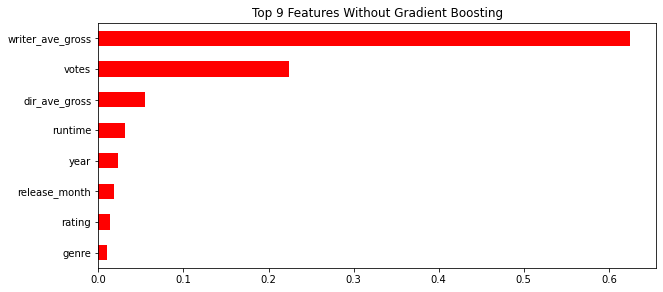

In [77]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 9
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} Features Without Gradient Boosting')
importances.sort_values()[-n:].plot.barh(color='red');

In [78]:
from xgboost import XGBRegressor

# get rid of the warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

gbpipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gbpipeline.fit(X_train, y_train)
y_pred = gbpipeline.predict(X_val)

# MAE
from sklearn.metrics import mean_absolute_error
y_pred = gbpipeline.predict(X_val)
print(f'MAE: ${mean_absolute_error(y_val, y_pred):,.0f}')

MAE: $16,073,057


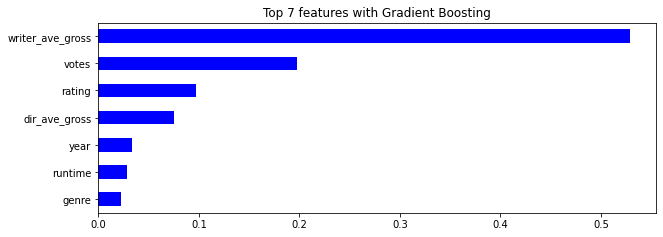

In [79]:
# Get feature importances
rf = gbpipeline.named_steps['xgbregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 7
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features with Gradient Boosting')
importances.sort_values()[-n:].plot.barh(color='blue');



#Assignment 3 Model Interpretation

##Gradient Boosting Model


In [80]:
from xgboost import XGBRegressor

# get rid of the warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

gbpipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    XGBRegressor(n_estimators=200, objective='reg:squarederror', n_jobs=-1)
)

gbpipeline.fit(X_train, y_train)
y_pred = gbpipeline.predict(X_val)

# MAE
from sklearn.metrics import mean_absolute_error
y_pred = gbpipeline.predict(X_val)
print(f'MAE: ${mean_absolute_error(y_val, y_pred):,.0f}')

MAE: $16,073,057


##Partial Dependence Plot

In [81]:
!pip install pdpbox

In [0]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

In [83]:
X_train.head()

,runtime,votes,year,dir_ave_gross,writer_ave_gross,genre,rating,release_month
0,100,4045,1986,4849211,15583149,Action,R,01
1,89,457,1986,1626657,1096843,Comedy,PG-13,01
2,82,7569,1986,12310408,5450815,Comedy,PG-13,01
3,117,11304,1986,13214797,12391598,Action,PG-13,01
4,73,187,1986,2193642,2193642,Family,G,01


In [84]:
X_train['year'].describe()

count    4400.000000
mean     1995.500455
std         5.766345
min      1986.000000
25%      1990.750000
50%      1995.500000
75%      2000.250000
max      2005.000000
Name: year, dtype: float64

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


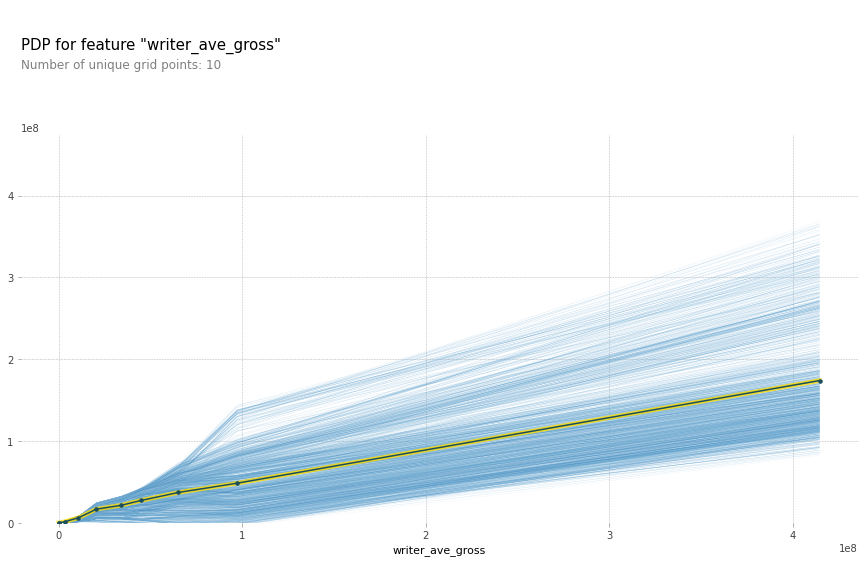

In [85]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'writer_ave_gross'

isolated = pdp_isolate(model = gbpipeline,
                       dataset = X_val,
                       model_features = X_val.columns,
                       feature = feature,
                      #  num_grid_points = 50
                       )

pdp_plot(isolated, feature_name = feature, plot_lines = True);

# plt.xlim((0,5));

##Shaply Force Plot

In [86]:
!pip install shap

In [0]:
encoder = ce.OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.fit(X_val)
X_test_encoded = encoder.fit_transform(X_test)

In [88]:
from scipy.stats import randint, uniform
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

param_distributions = { 
    'n_estimators': randint(50, 500), 
    'max_depth': [5, 10, 15, 20, None], 
    'max_features': uniform(0, 1), 
}

search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    param_distributions=param_distributions, 
    n_iter=5, 
    cv=2, 
    scoring='neg_mean_absolute_error', 
    verbose=10, 
    return_train_score=True, 
    n_jobs=-1, 
    random_state=42
)

search.fit(X_train_encoded, y_train);

Fitting 2 folds for each of 5 candidates, totalling 10 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    3.9s remaining:    3.9s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    5.5s remaining:    2.4s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.7s finished


In [92]:
print('Best hyperparameters:', search.best_params_)
print('Cross-validation MAE:', -search.best_score_)
model = search.best_estimator_

Best hyperparameters: {'max_depth': None, 'max_features': 0.596850157946487, 'n_estimators': 171}
Cross-validation MAE: 10039647.648791866


In [90]:
check = X_test_encoded.iloc[[15]]
model.predict(check)

array([80756468.64327486])

In [91]:
import shap

explainer = shap.TreeExplainer(model)
shap_value = explainer.shap_values(check)

shap.initjs()
shap.force_plot(
    base_value = explainer.expected_value,
    shap_values = shap_value,
    features = check
)